In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math as m

def heat_v(states):
    arr = states
    df = pd.DataFrame(np.nan, index=np.arange(0, 21), columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    #df = df.fillna(-1)
    z = df.to_numpy()
    ds = pd.DataFrame(arr, columns=['Q', 'T', 'x'])
    h = ds.groupby(['Q', 'T']).mean().reset_index()
    a = h.to_numpy()

    for i in range(31):  # Maximum inventory is 20
        for ii in range(0, 11):  # Maximum time is 5
            for iii in range(len(a)):
                if i == a[iii, 0] and ii == a[iii, 1]:
                    z[int(i), int(ii)] = a[iii, 2]
    sns.heatmap(z, cmap="YlGnBu")
    plt.xlabel('Time')
    plt.ylabel('Inventory') 
    plt.title('Heatmap of the average action per inventory and time step')
    plt.show()

def column_min_max_normalize(matrix, min, max):#, data
    """
    Normalizes a matrix of real numbers between 1 and -1 domain using min-max normalization.
    """
    # Find the minimum and maximum values for each column
    #scaler = pre.MinMaxScaler(feature_range=(-1, 1)).fit(matrix)
    min_vals = min#np.min(matrix, axis=0)#np.min(data)#
    max_vals = max#np.max(matrix, axis=0)#np.max(data)#
    range_vals = max_vals - min_vals
    
    # Perform column-wise min-max normalization
    normalized_matrix = 2 * (matrix - min_vals) / range_vals - 1
    
    if normalized_matrix.shape != ():
        for i in range(normalized_matrix.shape[0]):
            for ii in range(normalized_matrix.shape[1]):
                if normalized_matrix[i,ii] > 1: normalized_matrix[i,ii] = 1
                elif normalized_matrix[i,ii] <-1: normalized_matrix[i,ii] = -1

    return normalized_matrix 

def heatAct(data, min, max):

    n = 101
    #data = mu0qtp
    FILLER = -1
    def heatdn(states, thr1, thr2, h_min, h_max):
        arr = states
        df = pd.DataFrame(np.nan, index=np.arange(-1,n), columns=['1', '2', '3', '4', '5','6','7','8','9','10'])
        df = df.fillna(np.nan)
        z = df.to_numpy()#np.zeros((21,5))
        ds = pd.DataFrame(arr,columns=['Q', 'T', 'p', 'x'])
        ds['p'] = ds['p'].apply(column_min_max_normalize, args=(h_min, h_max))
        h = ds.where(ds['p'] >= thr1).where(ds['p'] <= thr2).groupby(['Q','T','p']).mean().reset_index()
        a = h.to_numpy()
        for i in range(n): #mx 20
            for ii in range(10): #mx 5
                for iii in range(len(a[:])):
                    if i == a[:,0][iii] and ii == a[:,1][iii]:
                        z[int(i),int(ii)] = a[iii,3]
        return z    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 20))

    # Loop through each subplot and generate a heatmap for it
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    cmap.set_bad((1,1,0.7))
    #ns.heatmap(z, cmap=cmap)
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:

                ax = sns.heatmap(heatdn(data,-0.75  ,-0.5, min,  max), ax=axs[i,j], cmap=cmap)
                ax.set_title('$-1 \leq \\bar{S} \leq -0.5$')#                

            elif i == 0 and j == 1:
                ax =sns.heatmap(heatdn(data,-0.5  ,0, min,  max), ax=axs[i,j],  cmap=cmap)
                ax.set_title('$-0.5 \leq \\bar{S} \leq 0$')#
            elif i == 1 and j == 0:
                ax =sns.heatmap(heatdn(data,0  ,0.5, min,  max), ax=axs[i,j],   cmap=cmap)
                ax.set_title('$0 \leq \\bar{S} \leq 0.5$')#
            else:
                ax =sns.heatmap(heatdn(data,0.5  ,0.75, min,  max), ax=axs[i,j],   cmap=cmap)
                ax.set_title('$0.5 \leq \\bar{S} \leq 1$')#
            #for h in range(len(q)):
            #    rect = plt.Rectangle((h, int(q[h])), 1, 1, fill=None, edgecolor='red', linewidth=1)
            #    ax.add_patch(rect)   
    # Add a main title to the figure
    fig.suptitle('Average $v$ conditioned to Q,T,$\\bar{S}$')

    # Show the figure
    plt.show()
    
def remove_outliers(data):
    # Calculate the IQR (Interquartile Range)
    Q1 = np.percentile(data, 10)
    Q3 = np.percentile(data, 90)
    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data

def rewards_per_episode(rew_0, rew_1, rew_sch_0, rew_sch_1):
    # Load rewards data
    rewards_0 = rew_0
    rewards_1 = rew_1

    # Load rewards_sch data
    rewards_sch_0 = rew_sch_0
    rewards_sch_1 = rew_sch_1

    # Time steps to plot
    time_steps_to_plot = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

    # Create figure and subplots
    fig, axs = plt.subplots(2, len(time_steps_to_plot)//2, figsize=(20, 8))

    # Store all data points in lists
    all_rewards_0 = []
    all_rewards_1 = []

    # Plot scatter plots for specified time steps
    for i, time_step in enumerate(time_steps_to_plot):
        row = i // (len(time_steps_to_plot)//2)
        col = i % (len(time_steps_to_plot)//2)
        ax = axs[row, col]

        # Generate a list of colors for each point
        colors = plt.cm.jet_r(np.linspace(0, 1, len(rewards_0)))  # Different colormap for rewards_0
        colors_sch = plt.cm.Set2(np.linspace(0, 1, len(rewards_sch_0)))  # Different colormap for rewards_sch

        # Plot rewards_0 and rewards_1
        for j in range(len(rewards_0)):
            ax.scatter(rewards_0[j, time_step], rewards_1[j, time_step], color=colors[j], s=300, alpha=1, label=f'time step {j+1}')
            ax.text(rewards_0[j, time_step], rewards_1[j, time_step], str(j+1), ha='center', va='center', fontsize=8, color='white')

        # Plot rewards_sch_0 and rewards_sch_1
        for k in range(len(rewards_sch_0)):
            ax.scatter(rewards_sch_0[k, time_step], rewards_sch_1[k, time_step], color=colors_sch[k], s=300, alpha=0.25, label=f'time step Sch. {k+1}')
            ax.text(rewards_sch_0[k, time_step], rewards_sch_1[k, time_step], str(k+1), ha='center', va='center', fontsize=8, color='white')

        ax.set_xlabel('Reward Ag. 1')
        ax.set_ylabel('Reward Ag. 2')
        ax.hlines(0, -300, 300, colors='k', linestyles='dashed', alpha=0.5)
        ax.vlines(0, -300, 300, colors='k', linestyles='dashed', alpha=0.5)
        ax.set_title(f'Scatter Plot episode {time_step}')

        # Store all data points
        all_rewards_0.extend(rewards_0[:, time_step])
        all_rewards_1.extend(rewards_1[:, time_step])

    # Set the same x-axis and y-axis limits for all subplots
    #for ax in axs.flat:
    #    ax.set_xlim(-70, 70)
    #    ax.set_ylim(-70, 70)
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), title='Legend')
    
    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()


def rewards_per_simulation(re_tot,rewards_sch):

    rewards_sch_0 = rewards_sch['arr_0'][0]
    rewards_sch_1 = rewards_sch['arr_0'][1]



    # Assuming re_tot, rewards_0, rewards_1, and rewards_sch_0 have been defined earlier

    fig, axs = plt.subplots(2, 5, figsize=(20, 10))  # 2 rows, 5 columns

    colors = plt.cm.jet_r(np.linspace(0, 1, re_tot.shape[2]))  # Different colormap for rewards_0
    colors_sch = plt.cm.Set2(np.linspace(0, 1, len(rewards_sch_0)))

    for simu in range(min(re_tot.shape[0], 10)):  # Iterate over simulation steps, limited to 10
        row = simu // 5  # Determine the row index
        col = simu % 5  # Determine the column index
        ax = axs[row, col]
        for j in range(re_tot.shape[2]):  # Iterate over the simulation steps
            # Accessing individual elements of re_tot[simu, 0, j] and re_tot[simu, 1, j]
            ax.scatter(re_tot[simu, 0, j, -1].item(), re_tot[simu, 1, j, -1].item(),
                       color=colors[j], s=300, alpha=1, label=f'time step RL {j+1}')
            ax.text(re_tot[simu, 0, j, -1].item(), re_tot[simu, 1, j, -1].item(),
                    str(j+1), ha='center', va='center', fontsize=8, color='white')


            ax.set_xlabel('Reward Ag. 1')
            ax.set_ylabel('Reward Ag. 2')
            ax.hlines(0, -300, 400, colors='k', linestyles='dashed', alpha=0.5)
            ax.vlines(0, -300, 400, colors='k', linestyles='dashed', alpha=0.5)
            ax.set_title(f'Scatter Plot simulation {simu+1}')


            ax.scatter(rewards_sch_0[j,-1].item(), rewards_sch_1[ j,-1].item(),
                         color=colors_sch[j], s=300, alpha=0.25, label=f'time step Nash. {j+1}')
            ax.text(rewards_sch_0[ j,-1].item(), rewards_sch_1[ j,-1].item(),
                    str(j+1), ha='center', va='center', fontsize=8, color='white')

        # Calculate correlation coefficient
        corr_coef = np.corrcoef(re_tot[simu, 0, :, -1], re_tot[simu, 1, :, -1])[0, 1]
        # Print correlation coefficient below the plot
        ax.text(0.5, -0.2, f'Correlation Coefficient: {corr_coef:.2f}', ha='center', va='center', transform=ax.transAxes)

    for ax in axs.flat:
        ax.set_xlim(-300,300)
        ax.set_ylim(-300,300)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Legend:')
    fig.suptitle('Scatter Plots of Average Rewards per Time Step for Unconstrained Agents over 10 Simulations')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()




In [4]:
q_0 = 200
T = 10
gamma = 0.001 # permanent impact k
lambd = 0.002 # temporary impact a
alpha = 1e-9 # risk aversion 
sigma = 0.00001 # volatility 
theta_hat = np.sqrt(gamma**2 + 4*alpha*sigma**2*lambd)/(2*lambd)
rho_hat = np.sqrt(gamma**2+12*alpha*sigma**2*lambd)/(6*lambd)
rho_plus = -gamma/(6*lambd) + rho_hat
rho_minus = -gamma/(6*lambd) - rho_hat
a = [q_0,]
for i in range(1,T+1):
    a.append((q_0 )/(2*m.sinh(rho_hat*T)) * (m.exp(rho_hat * T) * m.exp(rho_minus*i) - m.exp(-rho_hat * T) * m.exp(rho_plus*i)))

x = abs(np.diff(np.asarray(a)))
x

array([37.85320122, 32.04204306, 27.12300388, 22.95912711, 19.43448152,
       16.45093344, 13.92541451, 11.7876089 ,  9.97799551,  8.44619085])

$\sigma$ = 0
===


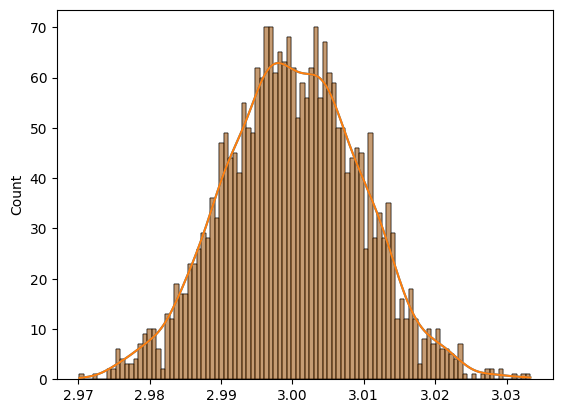

In [4]:
'''Plot dei rewards'''
rewards = (np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy', allow_pickle=True))
rewards_sch = dict(np.load('C:/Users/macri/Desktop/ennesima/THEO_100_inv/vola_0/re.npz', allow_pickle=True))

sns.histplot(remove_outliers(rewards[:,0].mean(axis=1).mean(0)), bins=100, kde=True)
sns.histplot(remove_outliers(rewards[:,1].mean(axis=1).mean(0)), bins=100, kde=True);

#sns.histplot(rewards_sch['arr_0'][0].reshape(10,-1).mean(axis=0), bins=100, kde=True);

In [5]:
remove_outliers(rewards[:,0].mean(axis=1).mean(0)).std()

0.009516148308491922

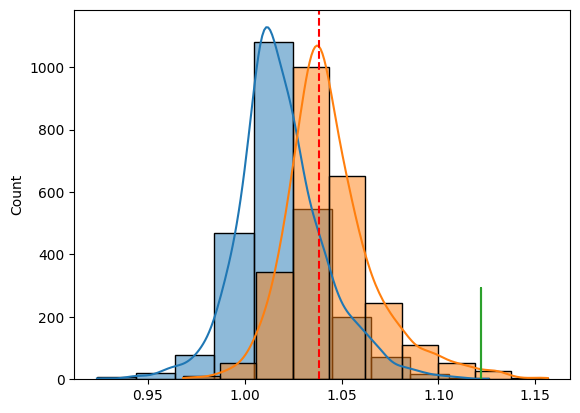

In [6]:
rewards = np.load('C:/Users/macri/Desktop/10_zero_vol/re_tot.npy', allow_pickle=True)
rewards_sch = dict(np.load('C:/Users/macri/Desktop/ennesima/THEO_100_inv/vola_0/re.npz', allow_pickle=True))
#sns.histplot(remove_outliers(rewards[:,0].mean(axis=1).mean(0)), bins=10, kde=True)
#sns.histplot(remove_outliers(rewards[:,1].mean(axis=1).mean(0)), bins=10, kde=True);
#rewards = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy', allow_pickle=True)
rewards_sch = dict(np.load('C:/Users/macri/Desktop/ennesima/THEO_100_inv/vola_0/re.npz', allow_pickle=True))
sns.histplot(remove_outliers(rewards[:,0].mean(axis=1).mean(0)), bins=10, kde=True)
sns.histplot(remove_outliers(rewards[:,1].mean(axis=1).mean(0)), bins=10, kde=True);
#rewards = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy', allow_pickle=True)
rewards_sch = dict(np.load('C:/Users/macri/Desktop/ennesima/THEO_100_inv/vola_0/re.npz', allow_pickle=True))

#sns.histplot(remove_outliers(rewards[:,0].mean(axis=1).mean(0)), bins=10, kde=True)
#ns.histplot(remove_outliers(rewards[:,1].mean(axis=1).mean(0)), bins=10, kde=True);
plt.axvline(((rewards[:,].mean(axis=1).mean(0)) + (rewards[:,1].mean(axis=1).mean(0))).mean()/2, color='r', linestyle='--')

#(200-rewards_sch)/2
sns.histplot(rewards_sch['arr_0'][0].reshape(10,-1).mean(axis=0), bins=50, kde=True);

In [7]:
rewards_sch['arr_0'][0].reshape(10,-1).mean(axis=0)#.mean()

array([1.12186079, 1.12186077, 1.12186081, ..., 1.12186079, 1.12186081,
       1.12186081])

In [8]:
from scipy import stats
stats.ttest_ind(rewards[:,1].mean(1).mean(1).flatten(), rewards_sch['arr_0'][0].reshape(10,-1).mean(axis=0).flatten(), equal_var=False)

Ttest_indResult(statistic=-1.5004853275477708, pvalue=0.16772727594700093)

In [9]:
remove_outliers(rewards[:,0].mean(axis=1).mean(0)).mean() + (rewards[:,1].mean(axis=1).mean(0)).mean() , rewards_sch['arr_0'][0].reshape(10,-1).mean(axis=0).mean() * 2


(2.0635609063732008, 2.243721596902329)

In [10]:
(rewards[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards[:,1].mean(axis=0).mean(axis=0)).mean()# + rewards[:,1].mean(axis=1).mean(axis=0)).mean()

2.0636787744675407

In [11]:
1.14+0.94

2.08

In [12]:
rewards_1 = np.load('C:/Users/macri/Desktop/10_molta_vol_0_01/re_tot.npy', allow_pickle=True)
(rewards_1[:,0].mean(axis=1) + rewards_1[:,1].mean(axis=1)).mean()
rewards_2 = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy', allow_pickle=True)

In [13]:
remove_outliers(rewards_1[:,0].mean(axis=1).mean(0)).mean() + (rewards_1[:,1].mean(axis=1).mean(0)).mean() , rewards_sch['arr_0'][0].reshape(10,-1).mean(axis=0).mean() * 2

(2.130651757916495, 2.243721596902329)

In [14]:
remove_outliers(rewards[:,0].mean(axis=1).mean(0)).mean() + (rewards[:,1].mean(axis=1).mean(0)).mean() , rewards_sch['arr_0'][0].reshape(10,-1).mean(axis=0).mean() * 2

(2.0635609063732008, 2.243721596902329)

In [15]:
remove_outliers(rewards_2[:,0].mean(axis=1).mean(0)).mean() + (rewards_2[:,1].mean(axis=1).mean(0)).mean() , rewards_sch['arr_0'][0].reshape(10,-1).mean(axis=0).mean() * 2

(6.00014946219601, 2.243721596902329)

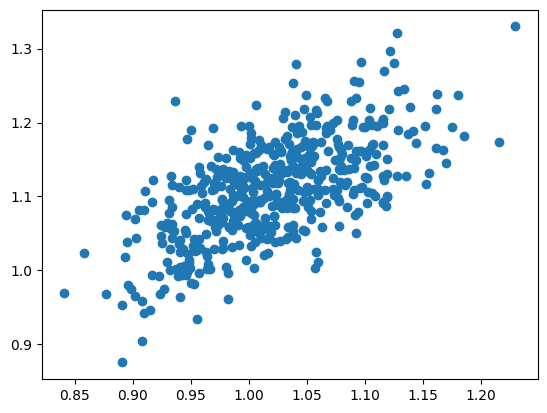

In [16]:
#rewards = np.load('C:/Users/macri/Desktop/10_zero_vol/re_tot.npy', allow_pickle=True)
#plt.scatter((rewards_1[:,0].mean(axis=0).mean(axis=0)), (rewards_1[:,1].mean(axis=0).mean(axis=0)), alpha = 0.5);
plt.scatter((rewards_1[:,0].mean(axis=0).mean(axis=0)), (rewards_1[:,1].mean(axis=0).mean(axis=0)));
#plt.scatter((rewards  [:,0].mean(axis=0).mean(axis=0)), (rewards  [:,1].mean(axis=0).mean(axis=0)));



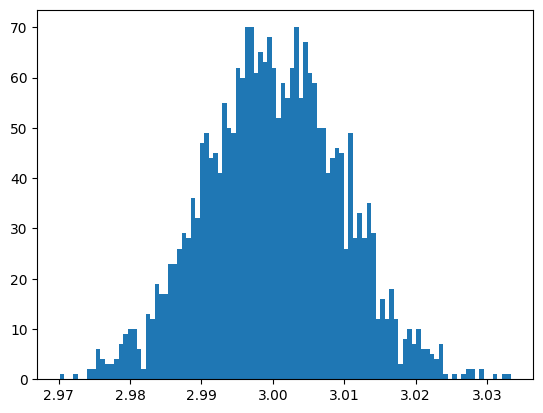

In [17]:
plt.hist(rewards_2[:,0].mean(axis=0).mean(axis=0), bins = 100);

In [18]:
np.corrcoef((rewards_1[:,0].mean(axis=0).mean(axis=0)), (rewards_1[:,1].mean(axis=0).mean(axis=0))), np.corrcoef((rewards  [:,0].mean(axis=0).mean(axis=0)), (rewards  [:,1].mean(axis=0).mean(axis=0))), np.corrcoef((rewards_2[:,0].mean(axis=0).mean(axis=0)), (rewards_2[:,1].mean(axis=0).mean(axis=0)))

(array([[1.        , 0.63652225],
        [0.63652225, 1.        ]]),
 array([[ 1.        , -0.26854968],
        [-0.26854968,  1.        ]]),
 array([[1., 1.],
        [1., 1.]]))

In [4]:
#-INV +  data[0] * x - self.a_penalty * (x ** 2)
-100 + 10*10 - 0.002 * (10 ** 2)

-0.2

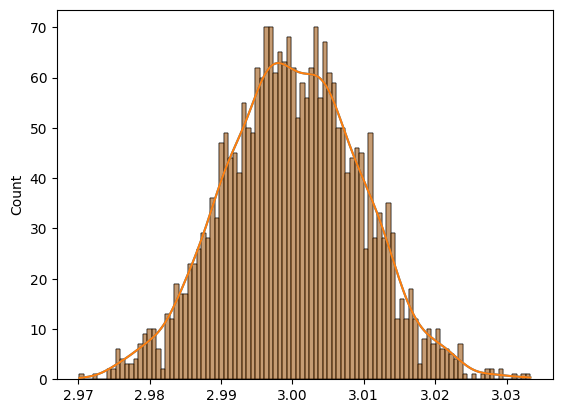

In [19]:
sns.histplot(remove_outliers(rewards_2[:,0].mean(axis=1).mean(0)), bins=100, kde=True)
sns.histplot(remove_outliers(rewards_2[:,1].mean(axis=1).mean(0)), bins=100, kde=True);

In [20]:
(rewards_1[:,0].mean(axis=1).mean(axis=0)).mean() + (rewards_1[:,1].mean(axis=1).mean(axis=0)).mean()# + rewards[:,1].mean(axis=1).mean(axis=0)).mean()

2.130651757916495

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

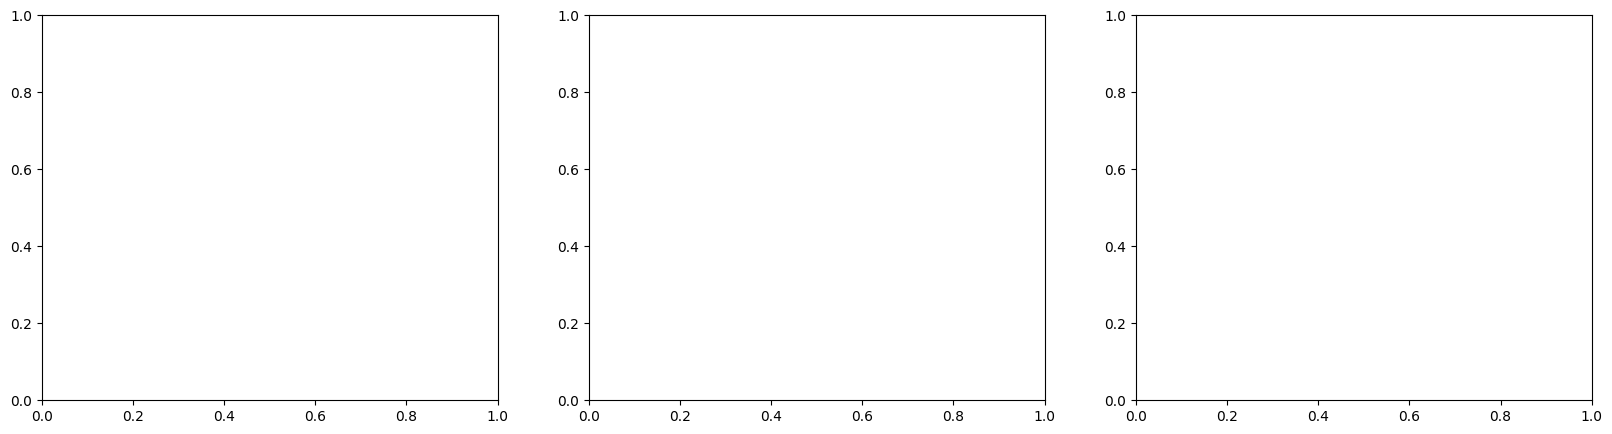

In [21]:

# Create a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the first histogram
sns.histplot(remove_outliers(rewards['arr_0'][0].reshape(10,-1).mean(axis=0)), bins=100, kde=True, ax=axs[0])
axs[0].set_title('Agent 1')
axs[0].set_ylim(0, 200)

# Plot the second histogram
sns.histplot(remove_outliers(rewards['arr_0'][1].reshape(10,-1).mean(axis=0)), bins=100, kde=True, ax=axs[1])
axs[1].set_title('Agent 2')
axs[1].set_ylim(0, 200)

# Plot the third histogram
sns.histplot((rewards_sch['arr_0'][1].reshape(10,-1).mean(axis=0)), bins=100, kde=True, ax=axs[2])
axs[2].set_title('Theoretical')
axs[2].set_ylim(0, 200)

#axs.set_ylim(0, 2000)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

print(f'IS mean via rewards for RL agents : {remove_outliers(np.mean(rewards["arr_0"][0].reshape(10,-1).mean(axis=0) + rewards["arr_0"][1].reshape(10,-1).mean(axis=0)) * 10).item():.2f}, std: {remove_outliers(np.mean(rewards["arr_0"][0].reshape(10,-1).mean(axis=0) + rewards["arr_0"][1].reshape(10,-1).mean(axis=0)) * 10).std():.2f}')
print(f'IS mean via rewards for Nash agents : {remove_outliers(np.mean(rewards_sch["arr_0"][0].reshape(10,-1).mean(axis=0) + rewards_sch["arr_0"][1].reshape(10,-1).mean(axis=0))).item() * 10:.2f}, std: {np.mean(rewards_sch["arr_0"][0].reshape(10,-1).mean(axis=0) + rewards_sch["arr_0"][1].reshape(10,-1).mean(axis=0)).std():.2f}')

sembra che al decrescere della volatilità, diminuisca is e loro sono meno collaborativi: uno vince e l'altro perde sempre in media è sempre agente 0 che ha più costi
se c'è molta volatilità sembrano convergere verso equilibrio di nash, sono molto più vicino a quell'IS, i due agenti fanno in pratica la stessa cosa

In [ ]:
azioni = azioni = np.load('C:/Users/macri/Desktop/10_zero_vol/azioni_tot.npy', allow_pickle=True)
azionimu0 = azioni[:,0].mean(axis=0).mean(axis=1)
azionimu0

array([ 8.10324855, 15.17694939, 13.89391164, 11.01224437,  8.57701302,
        5.92181364,  6.40675335, 10.15155531,  6.58989312, 14.16661759])

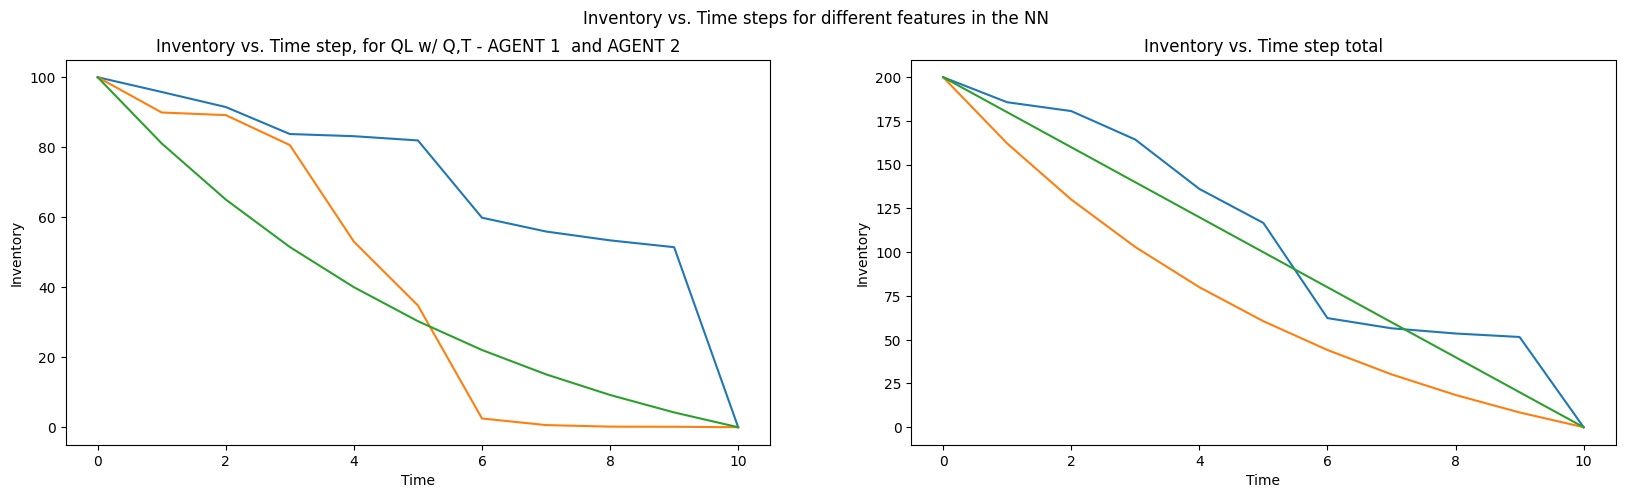

''

In [10]:
'''Somma inventari per volumi totali tradati da etrambi gli agenti'''
T=10
INV = 100
azioni = azioni = dict(np.load('C:/Users/macri/Desktop/ennesima/azioni.npz', allow_pickle=True))
azionimu0 = azioni['arr_0'][0].mean(axis=1)
q0 = np.zeros(11) 
q0[0] = INV
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = azioni['arr_0'][1].mean(axis=1)
q = np.zeros(11) 
q[0] = INV
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

azioni_tw = np.ones((5_000,10)) * 10
twat = azioni_tw.reshape(-1,10).mean(0)
twap = np.zeros(11) 
twap[0] = INV
for i in range(1,10):
    twap[i] =  twap[i - 1] - twat[i - 1]

q_0 = 200#q_0 #* 2#/4
azioni1 = azioni['arr_0'][0].mean(axis=1)
azioni2 = azioni['arr_0'][1].mean(axis=1)
azioni = (azioni1 + azioni2)#/2
qt = np.zeros(T+1) 
qt[0] = q_0
for i in range(1,T):
    qt[i] =  qt[i - 1] - azioni[i - 1]



b = np.asarray(a)/2

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].plot(b)
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T - AGENT 1  and AGENT 2')

axs[1].plot(qt)
axs[1].plot(b*2)
axs[1].plot(twap * 2)
axs[1].set_ylabel('Inventory')
axs[1].set_xlabel('Time')
axs[1].set_title('Inventory vs. Time step total')

fig.suptitle('Inventory vs. Time steps for different features in the NN')


plt.show()
;

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


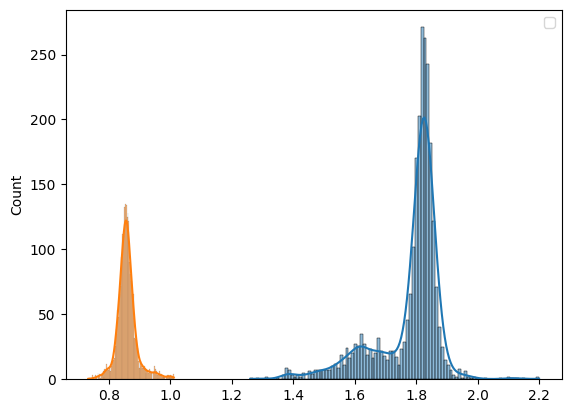

In [9]:
rewards_2 = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz', allow_pickle=True))



sns.histplot(remove_outliers(rewards_2['arr_0'][0].mean(axis=0)), alpha = 0.5, bins = 100, kde=True);
sns.histplot(remove_outliers(rewards_2['arr_0'][1].mean(axis=0)), alpha = 0.5, bins = 100, kde=True)
#plt.axvline(1.122, color='r', linestyle='dashed', linewidth=1, label='Nash');
#c = ((rewards_1[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_1[:,1].mean(axis=0).mean(axis=0)).mean() + (rewards_2[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_2[:,1].mean(axis=0).mean(axis=0)).mean() + (rewards_0[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_0[:,1].mean(axis=0).mean(axis=0)).mean()
#+ (rewards_3[:,0].mean(axis=0).mean(axis=0)).mean()+ (rewards_3[:,1].mean(axis=0).mean(axis=0)).mean())/4
#plt.axvline(c, color='blue', linestyle= 'dotted', label = 'average Agents')
plt.legend()
plt.show()


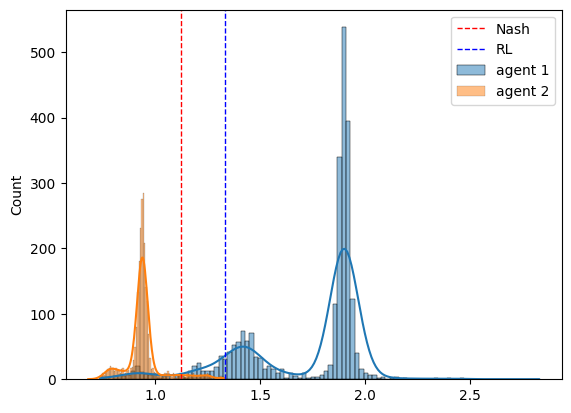

In [33]:
rewards_2 = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz', allow_pickle=True))



sns.histplot(remove_outliers(rewards_2['arr_0'][0].mean(axis=0)), alpha = 0.5, bins = 100, kde=True, label = 'agent 1');
sns.histplot(remove_outliers(rewards_2['arr_0'][1].mean(axis=0)), alpha = 0.5, bins = 100, kde=True , label = 'agent 2')
plt.axvline(1.122, color='r', linestyle='dashed', linewidth=1, label='Nash')
plt.axvline((rewards_2['arr_0'][0].mean(axis=0).mean() + rewards_2['arr_0'][1].mean(axis=0).mean())/2, color='b', linestyle='dashed', linewidth=1, label='RL')

#c = ((rewards_2[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_2[:,1].mean(axis=0).mean(axis=0)).mean() + (rewards_2[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_2[:,1].mean(axis=0).mean(axis=0)).mean() + (rewards_0[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_0[:,1].mean(axis=0).mean(axis=0)).mean()
#+ (rewards_3[:,0].mean(axis=0).mean(axis=0)).mean()+ (rewards_3[:,1].mean(axis=0).mean(axis=0)).mean())/4
#plt.axvline(c, color='blue', linestyle= 'dotted', label = 'average Agents')
plt.legend()
plt.show()

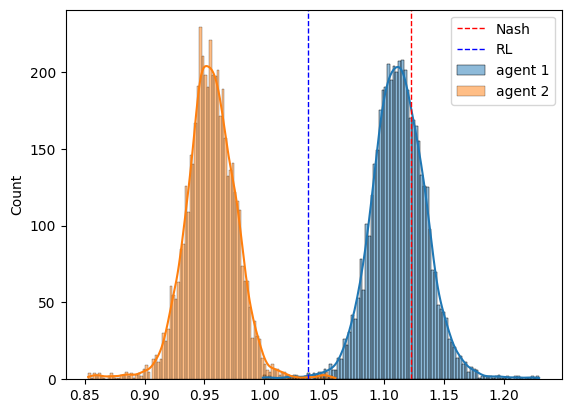

In [24]:
rewards_2 = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz', allow_pickle=True))



sns.histplot(remove_outliers(rewards_2['arr_0'][0].mean(axis=0)), alpha = 0.5, bins = 100, kde=True, label = 'agent 1');
sns.histplot(remove_outliers(rewards_2['arr_0'][1].mean(axis=0)), alpha = 0.5, bins = 100, kde=True , label = 'agent 2')
plt.axvline(1.122, color='r', linestyle='dashed', linewidth=1, label='Nash')
plt.axvline((rewards_2['arr_0'][0].mean(axis=0).mean() + rewards_2['arr_0'][1].mean(axis=0).mean())/2, color='b', linestyle='dashed', linewidth=1, label='RL')

#c = ((rewards_2[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_2[:,1].mean(axis=0).mean(axis=0)).mean() + (rewards_2[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_2[:,1].mean(axis=0).mean(axis=0)).mean() + (rewards_0[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_0[:,1].mean(axis=0).mean(axis=0)).mean()
#+ (rewards_3[:,0].mean(axis=0).mean(axis=0)).mean()+ (rewards_3[:,1].mean(axis=0).mean(axis=0)).mean())/4
#plt.axvline(c, color='blue', linestyle= 'dotted', label = 'average Agents')
plt.legend()
plt.show()

In [ ]:
(rewards_2['arr_0'][0].mean(axis=0) +rewards_2['arr_0'][1].mean(axis=0)).mean()

1.95653359969479

In [1]:
'''Somma inventari per volumi totali tradati da etrambi gli agenti'''

INV = 100
azioni = azioni = dict(np.load('C:/Users/macri/Desktop/ennesima/azioni.npz', allow_pickle=True))
azionimu0 = (azioni['arr_0'][0].mean(axis=1))
q0 = np.zeros(11) 
q0[0] = INV
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = (azioni['arr_0'][1].mean(axis=1))
q = np.zeros(11) 
q[0] = INV
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

azioni_tw = np.ones((5_000,10)) * 2
twat = azioni_tw.reshape(-1,10).mean(0)
twap = np.zeros(11) 
twap[0] = INV
for i in range(1,10):
    twap[i] =  twap[i - 1] - twat[i - 1]

q_0 = 200#q_0 #* 2#/4
azioni1 = azioni['arr_0'][0].mean(axis=1)
azioni2 = azioni['arr_0'][1].mean(axis=1)
azioni = (azioni1 + azioni2)#/2
qt = np.zeros(T+1) 
qt[0] = q_0
for i in range(1,T):
    qt[i] =  qt[i - 1] - azioni[i - 1]



b = np.asarray(a)/2

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].plot(b)
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T - AGENT 1  and AGENT 2')

axs[1].plot(qt)
axs[1].plot(b*2)
axs[1].set_ylabel('Inventory')
axs[1].set_xlabel('Time')
axs[1].set_title('Inventory vs. Time step total')

fig.suptitle('Inventory vs. Time steps for different features in the NN')


plt.show()
;

NameError: name 'np' is not defined

In [ ]:
np.sort(azioni)[::-1]

array([47.67679182, 27.40683944, 20.88881932, 20.16417199, 20.00802336,
       16.69219685, 15.00145055, 12.42520251, 11.36704949,  8.36945467])

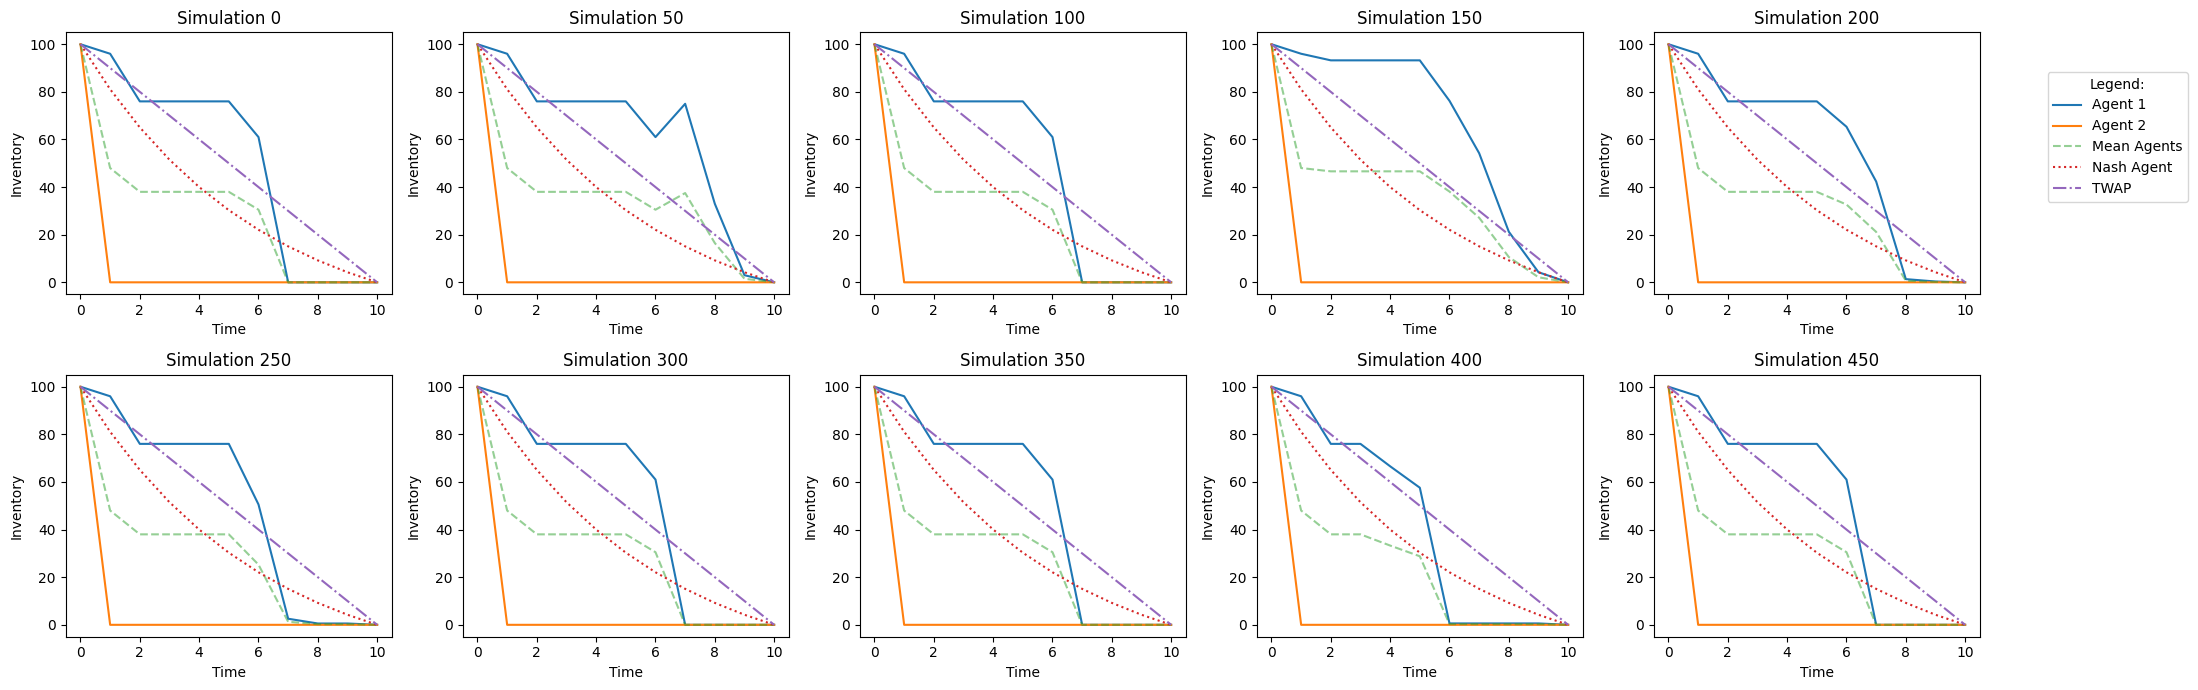

In [12]:
''' Selling Schedules per episodio di test'''
def make_selling_schedule(ax, a, azioni, T, i=0, inv=100):
    azioni_tot_1 = azioni[0]
    azioni_tot_2 = azioni[1]
    agent_1 = azioni_tot_1[:, i]
    agent_2 = azioni_tot_2[:, i]
    
    q0_1 = np.zeros(T + 1)
    q0_1[0] = inv
    for j in range(1, T):
        q0_1[j] = q0_1[j - 1] - agent_1[j - 1]
    q0_2 = np.zeros(T + 1)
    q0_2[0] = inv
    for j in range(1, T):
        q0_2[j] = q0_2[j - 1] - agent_2[j - 1]

    q_tot = inv# * 2
    azioni_t = (agent_1 + agent_2) / 2
    qt = np.zeros(T + 1)
    qt[0] = q_tot
    for j in range(1, T):
        qt[j] = qt[j - 1] - azioni_t[j - 1]

    azioni_tw = np.ones((5_000,10)) * 10
    twat = azioni_tw.reshape(-1,10).mean(0)
    twap = np.zeros(11) 
    twap[0] = INV
    for i in range(1,10):
        twap[i] =  twap[i - 1] - twat[i - 1]

    b = np.asarray(a) / 2

    ax.plot(q0_1, label='Agent 1' )
    ax.plot(q0_2, label='Agent 2' )
    ax.plot(qt, alpha=0.5, label='Mean Agents',  linestyle='--')
    ax.plot(b, label='Nash Agent', linestyle=':')
    ax.plot(twap, label ='TWAP' ,  linestyle='-.')

def do_is(i, dati, azioni, alpha=0.002):
    dati = dati#[i,:,0]
    azioni1 =  azioni[0]
    azioni2 =  azioni[1]
    azioni = (azioni1 + azioni2)
    iss = []

    iss = dati[: ,i ]* azioni[: ,i ] - \
               alpha * azioni[: ,i ]**2

    agents = np.sum((np.asarray(iss)))
    agents_std = np.sum((np.asarray(iss))).std()

    return 2000-remove_outliers(agents),  agents_std

# Load data
azioni_tot = dict(np.load('C:/Users/macri/Desktop/ennesima/azioni.npz', allow_pickle=True))
dati_tot   = dict(np.load('C:/Users/macri/Desktop/ennesima/ULTIMA_BASTA_VA_BENE_vola_0/dati.npz', allow_pickle=True))  
dati = dati_tot['arr_0'][:,0].reshape(10 , -1)
azioni = azioni_tot['arr_0']

T = len(azioni[0])

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 7))

# Plot each selling schedule
for i, ax in enumerate(axs.flat):
    i *= 50#1#550
    make_selling_schedule(ax, a, azioni, T, i, 100)
    ax.set_title(f"Simulation {i}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Inventory')
    IS, IS_std = do_is(i, dati, azioni, alpha=0.002)

# Get handles and labels from the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()

# Add legend using handles and labels
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 0.9), title='Legend:')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
azioni_tot['arr_0'][0,:,350]

array([ 7., 23., 18.,  7.,  8., 10., 12., 14.,  0.,  1.])

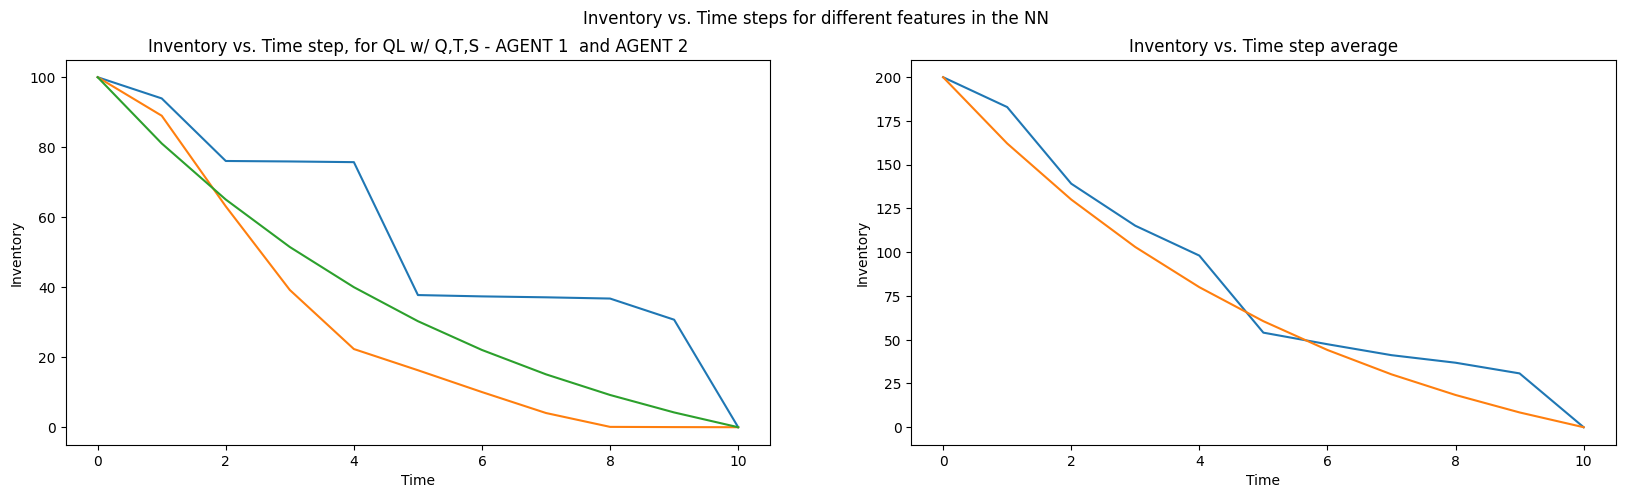

In [ ]:
'''Average selling schedule'''
INV = 100
azioni = dict(np.load('C:/Users/macri/Desktop/ennesima/ULTIMA_BASTA_VA_BENE_vola_0//azioni.npz', allow_pickle=True))
azionimu0 = azioni['arr_0'][0].mean(axis=1)
q0 = np.zeros(11) 
q0[0] = INV
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = azioni['arr_0'][1].mean(axis=1)
q = np.zeros(11) 
q[0] = INV
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

azioni_tw = np.ones((5_000,10)) * 2
twat = azioni_tw.reshape(-1,10).mean(0)
twap = np.zeros(11) 
twap[0] = INV
for i in range(1,10):
    twap[i] =  twap[i - 1] - twat[i - 1]

q_0 = 200#q_0 #* 2#/4
azioni1 = azioni['arr_0'][0].mean(axis=1)
azioni2 = azioni['arr_0'][1].mean(axis=1)
azioni = (azioni1 + azioni2)#/2
qt = np.zeros(T+1) 
qt[0] = q_0
for i in range(1,T):
    qt[i] =  qt[i - 1] - azioni[i - 1]



b = np.asarray(a)/2

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].plot(b)
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T,S - AGENT 1  and AGENT 2')

axs[1].plot(qt)
axs[1].plot(b*2)
axs[1].set_ylabel('Inventory')
axs[1].set_xlabel('Time')
axs[1].set_title('Inventory vs. Time step average')

fig.suptitle('Inventory vs. Time steps for different features in the NN')


plt.show()

In [ ]:
'''Rewards per time steps per entrambi gli agenti'''

# Load data
rewards = (np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy', allow_pickle=True))
rewards_sch = dict(np.load('C:/Users/macri/Desktop/ennesima/THEO_100_inv/vola_0/re.npz', allow_pickle=True))
rewards_0     = (rewards[:,0]    )
rewards_1     = (rewards[:,1]    )

#rewards['arr_0'][0].shape
rewards_sch_0 = (rewards_sch['arr_0'][0])
rewards_sch_1 = (rewards_sch['arr_0'][1])

rewards_per_episode(rewards_0, rewards_1, rewards_sch_0, rewards_sch_1)

IndexError: index 500 is out of bounds for axis 1 with size 10

Error in callback <function _draw_all_if_interactive at 0x00000123602F4700> (for post_execute):


TypeError: only length-1 arrays can be converted to Python scalars

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 2000x800 with 10 Axes>

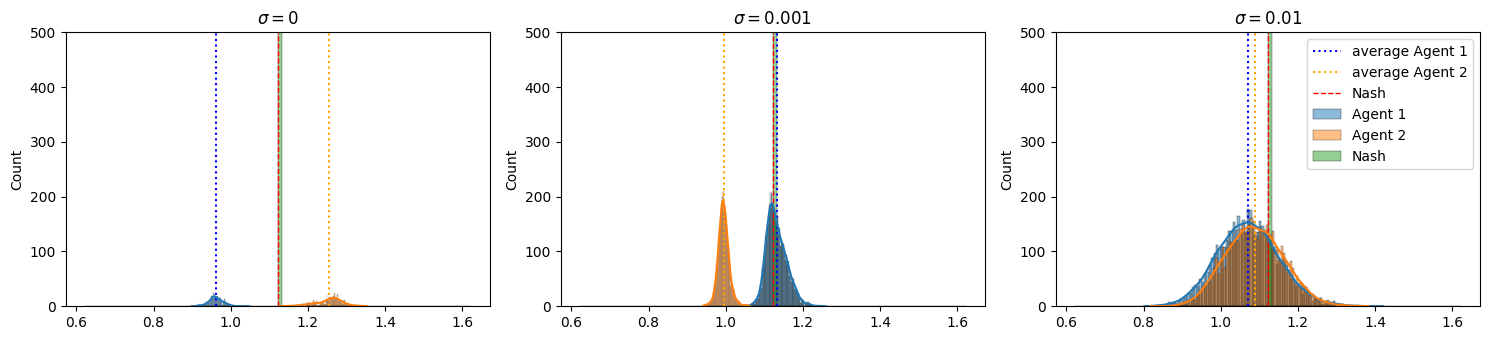

IS mean via rewards for RL agents : 2.22, std:     0.41
IS mean via rewards for RL agents : 2.09, std: 0.13
IS mean via rewards for RL agents : 2.13, std: 0.16


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_rewards(rewards_file_path, rewards_1_file_path, rewards_2_file_path, rewards_3_file_path, rewards_sch_file_path):
    
    # Load rewards data
    rewards = np.load(rewards_file_path, allow_pickle=True)
    rewards_1 = np.load(rewards_1_file_path, allow_pickle=True)
    rewards_2 = np.load(rewards_2_file_path, allow_pickle=True)
    rewards_3 = np.load(rewards_3_file_path, allow_pickle=True)
    rewards_sch = (np.load(rewards_sch_file_path, allow_pickle=True))*0+ 1.122
    
    # Create a grid of subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 3.5))
    i = 1
    # Plot the histograms in each subplot
    axs[0].set_title('$\sigma = 0$')
    axs[0].set_ylim(0, 500)     
    axs[0].axvline(1.122, color='r', linestyle='dashed', linewidth=1, label='Nash')  
    axs[0].axvline(rewards[:,0].mean(axis=1).mean(axis = 0).mean(), color='blue', linestyle= 'dotted', label = 'average Agent 1')  
    axs[0].axvline(rewards[:,1].mean(axis=1).mean(axis = 0).mean(), color='orange', linestyle= 'dotted', label = 'average Agent 2')  
    sns.histplot(remove_outliers(rewards[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[0], label = 'Agent 1')
    sns.histplot(remove_outliers(rewards[:,1].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[0], label = 'Agent 2')
    sns.histplot(remove_outliers(rewards_sch[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[0], label = 'Nash')
    #axs[1].axvline(rewards_1[:,0].mean(axis=1).mean(axis = 0).mean(), color='blue', linestyle= 'dotted', label = 'average Agent 1') 
    #axs[1].axvline(rewards_1[:,1].mean(axis=1).mean(axis = 0).mean(), color='orange', linestyle= 'dotted', label = 'average Agent 2') 
    #axs[1].axvline(1.122, color='r', linestyle='dashed', linewidth=1, label='Nash')     
    #axs[1].set_title('$\sigma = 0.0001$')
    #axs[1].set_ylim(0, 500)            
    #sns.histplot(remove_outliers(rewards_1[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[1], label = 'Agent 1')
    #sns.histplot(remove_outliers(rewards_1[:,1].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[1], label = 'Agent 2')
    #sns.histplot(remove_outliers(rewards_sch[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[1], label = 'Nash')
    axs[1].axvline(rewards_2[:,0].mean(axis=1).mean(axis = 0).mean(), color='blue', linestyle= 'dotted', label = 'average Agent 1')
    axs[1].axvline(rewards_2[:,1].mean(axis=1).mean(axis = 0).mean(), color='orange', linestyle= 'dotted', label = 'average Agent 2')
    axs[1].axvline(1.122, color='r', linestyle='dashed', linewidth=1, label='Nash')
    axs[1].set_title('$\sigma = 0.001$')
    axs[1].set_ylim(0, 500)            
    sns.histplot(remove_outliers(rewards_2[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[1], label = 'Agent 1')
    sns.histplot(remove_outliers(rewards_2[:,1].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[1], label = 'Agent 2')
    sns.histplot(remove_outliers(rewards_sch[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[1], label = 'Nash')
    axs[2].axvline(rewards_3[:,0].mean(axis=1).mean(axis = 0).mean(), color='blue', linestyle= 'dotted', label = 'average Agent 1')
    axs[2].axvline(rewards_3[:,1].mean(axis=1).mean(axis = 0).mean(), color='orange', linestyle= 'dotted', label = 'average Agent 2')
    axs[2].axvline(1.122, color='r', linestyle='dashed', linewidth=1, label='Nash')
    axs[2].set_title('$\sigma = 0.01$')
    axs[2].set_ylim(0, 500)            
    sns.histplot(remove_outliers(rewards_3[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True,   ax=axs[2], label = 'Agent 1')
    sns.histplot(remove_outliers(rewards_3[:,1].mean(axis=1).mean(axis = 0)), bins=100, kde=True,   ax=axs[2], label = 'Agent 2')
    sns.histplot(remove_outliers(rewards_sch[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[2], label = 'Nash')
    #fig.text(0.5, 0.04, 'Reward', ha='center', va='center')

    #axs[i, 2].set_title('Agent 1')
    #axs[i, 2].set_ylim(0, 2200) 
    #sns.histplot((rewards_sch['arr_0'][1].reshape(10,-1).mean(axis=0)), bins=100, kde=True, ax=axs[i, 2])
    #axs[i, j].set_title('Agent 1')
    #axs[i, j].set_ylim(0, 2200)
 # Adjust the spacing between subplots
    plt.tight_layout()

    plt.legend()

    # Show the figure
    plt.show()

    # Print statistics
    print(f'IS mean via rewards for RL agents : {remove_outliers(np.mean(rewards[:,0].mean(axis=1) + rewards[:,1].mean(axis=1))).item():.2f}, std:     {remove_outliers((rewards[:,0].mean(axis=1) + rewards[:,1].mean(axis=1))).std():.2f}')
    print(f'IS mean via rewards for RL agents : {remove_outliers(np.mean(rewards_1[:,0].mean(axis=1) + rewards_1[:,1].mean(axis=1))).item():.2f}, std: {remove_outliers((rewards_1[:,0].mean(axis=1) + rewards_1[:,1].mean(axis=1))).std():.2f}')
    print(f'IS mean via rewards for RL agents : {remove_outliers(np.mean(rewards_2[:,0].mean(axis=1) + rewards_2[:,1].mean(axis=1))).item():.2f}, std: {remove_outliers((rewards_2[:,0].mean(axis=1) + rewards_2[:,1].mean(axis=1))).std():.2f}')

    
    #print(f'IS mean via rewards for Nash agents : {np.mean(rewards_sch["arr_0"][0].reshape(10,-1).mean(axis=0) + rewards_sch["arr_0"][1].reshape(10,-1).mean(axis=0)).item():.2f}, std: {np.std(rewards_sch["arr_0"][0].reshape(10,-1).mean(axis=1) + rewards_sch["arr_0"][1].reshape(10,-1).mean(1)):.2f}')

# Usage C:/Users/macri/Desktop/10_bassa_vol_0_0001/re_tot.npy
#plot_rewards('C:/Users/macri/Desktop/10_zero_vol/re_tot.npy', 'C:/Users/macri/Desktop/ennesima/train_10_batch_32/re_tot.npy', 'C:/Users/macri/Desktop/10_media_vol/re_tot.npy', 'C:/Users/macri/Desktop/10_molta_vol/re_tot.npy' ,  'C:/Users/macri/Desktop/ennesima//re_tot.npy')
plot_rewards('C:/Users/macri/Desktop/ennesima/re_tot.npy', 'C:/Users/macri/Desktop/ennesima/train_10_batch_32/re_tot.npy', 'C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy', 'C:/Users/macri/Desktop/10_molta_vol_0_01/re_tot.npy' ,  'C:/Users/macri/Desktop/ennesima/re_tot.npy')


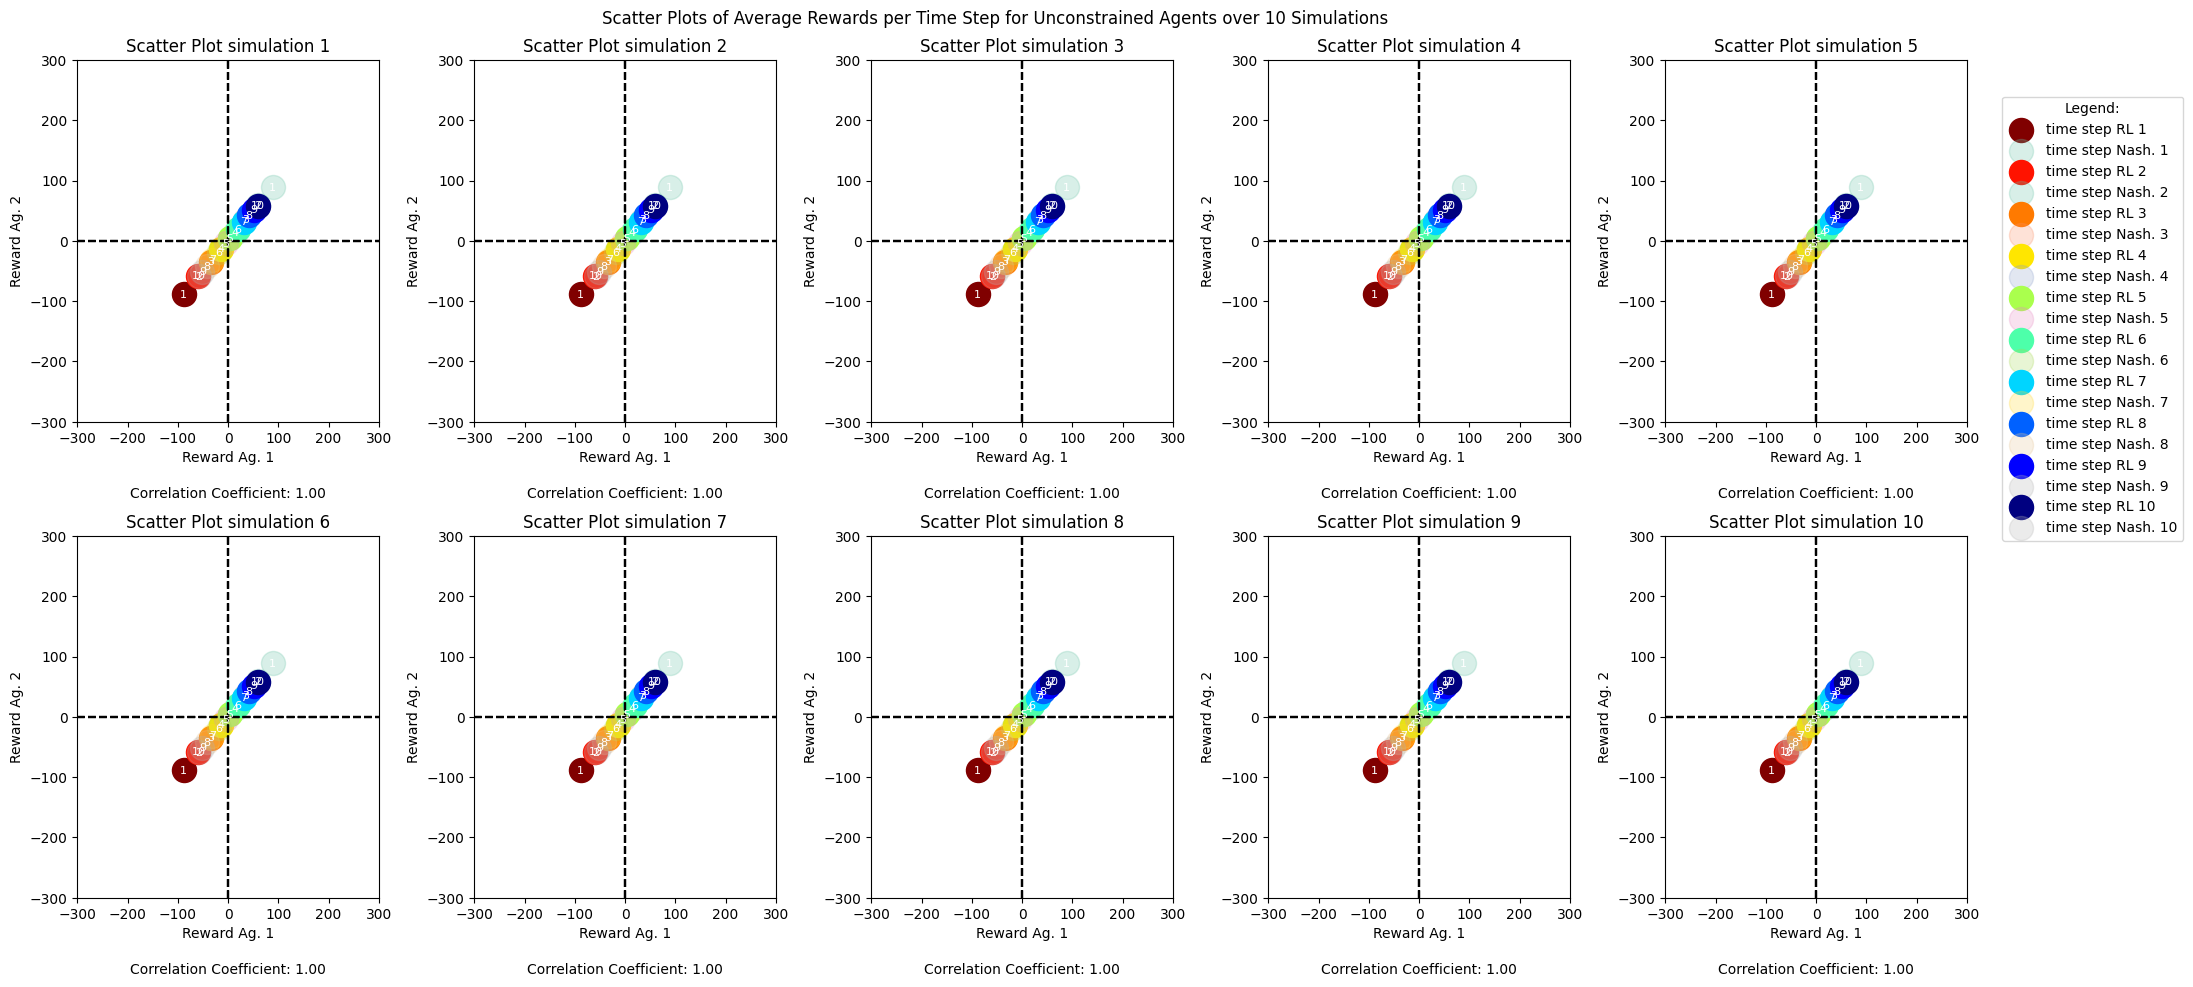

In [ ]:
re_tot = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy')
rewards_sch =  dict(np.load('C:/Users/macri/Desktop/ennesima - Copia/THEO_100_inv/re.npz', allow_pickle=True))
rewards_per_simulation(re_tot, rewards_sch)

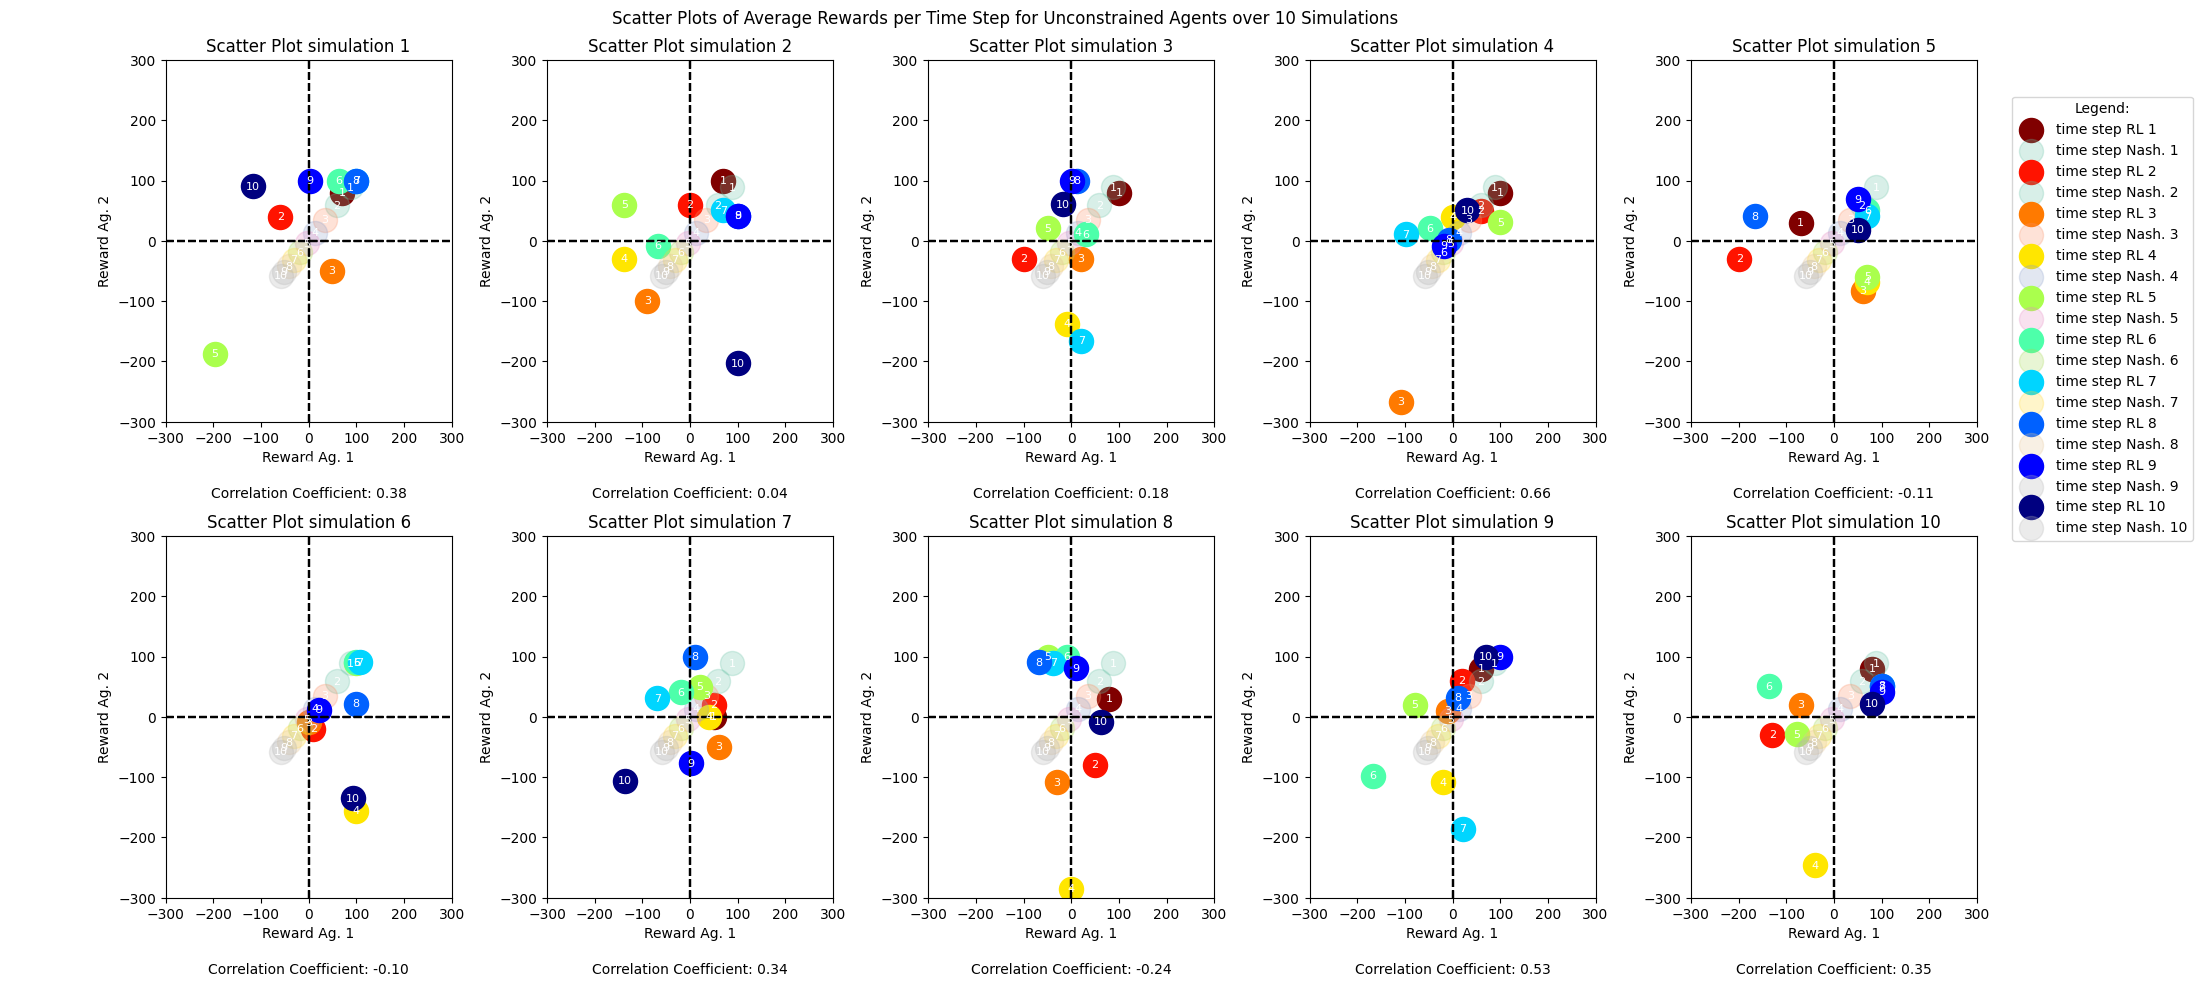

In [ ]:
re_tot = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy')
rewards_sch =  dict(np.load('C:/Users/macri/Desktop/ennesima - Copia/THEO_100_inv/re.npz', allow_pickle=True))
rewards_per_simulation(re_tot, rewards_sch)

In [ ]:
(rewards_3[:,0].mean(axis=0).mean(axis=0))+ (rewards_3[:,1].mean(axis=0).mean(axis=0))

array([2.23431836, 2.15274355, 2.22796522, ..., 2.23478375, 2.22901617,
       2.2266273 ])

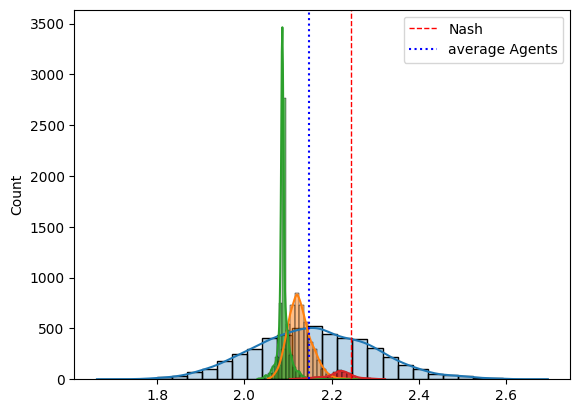

In [ ]:
rewards_2 = np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy', allow_pickle=True)
rewards_1 = np.load('C:/Users/macri/Desktop/10_molta_vol_0_01/re_tot.npy', allow_pickle=True)
rewards_0 = np.load('C:/Users/macri/Desktop/10_zero_vol/re_tot.npy', allow_pickle=True)
rewards_3 = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy', allow_pickle=True)

sns.histplot((rewards_1[:,0].mean(axis=0).mean(axis=0))+ (rewards_1[:,1].mean(axis=0).mean(axis=0)), alpha = 0.3, bins = 30, kde=True);
sns.histplot((rewards_2[:,0].mean(axis=0).mean(axis=0))+ (rewards_2[:,1].mean(axis=0).mean(axis=0)), alpha = 0.5, bins = 20, kde=True);
sns.histplot((rewards_0[:,0].mean(axis=0).mean(axis=0))+ (rewards_0[:,1].mean(axis=0).mean(axis=0)), alpha = 0.7, bins = 30, kde=True);
sns.histplot((rewards_3[:,0].mean(axis=0).mean(axis=0))+ (rewards_3[:,1].mean(axis=0).mean(axis=0)), alpha = 0.9, bins = 20, kde=True);
plt.axvline(1.122*2, color='r', linestyle='dashed', linewidth=1, label='Nash');
c = ((rewards_1[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_1[:,1].mean(axis=0).mean(axis=0)).mean() + (rewards_2[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_2[:,1].mean(axis=0).mean(axis=0)).mean() + (rewards_0[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_0[:,1].mean(axis=0).mean(axis=0)).mean()
+ (rewards_3[:,0].mean(axis=0).mean(axis=0)).mean()+ (rewards_3[:,1].mean(axis=0).mean(axis=0)).mean())/4
plt.axvline(c, color='blue', linestyle= 'dotted', label = 'average Agents')
plt.legend()
plt.show()


In [ ]:
rewards[:,0].mean(axis=1).mean(axis = 0).mean()

0.9915808557570739

$\sigma = 0.01$
===

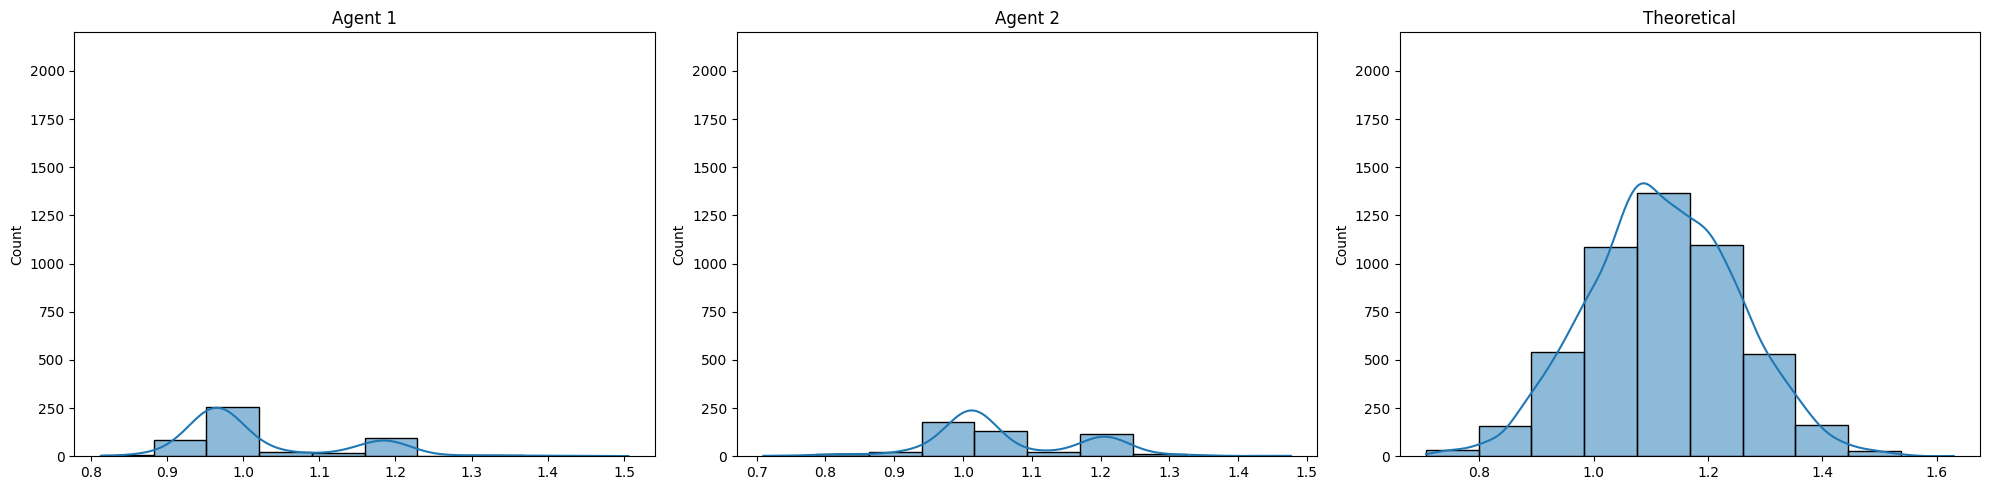

IS mean via rewards for RL agents : 20.94, std: 0.00
IS mean via rewards for Nash agents : 22.43, std: 0.00


In [ ]:
'''Plot dei rewards'''
rewards = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz', allow_pickle=True))
rewards_sch = dict(np.load('C:/Users/macri/Desktop/ennesima/THEO_100_inv/vola_0.01/re.npz', allow_pickle=True))

# Create a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the first histogram
sns.histplot(remove_outliers(rewards['arr_0'][0].reshape(10,-1).mean(axis=0)), bins=10, kde=True, ax=axs[0])
axs[0].set_title('Agent 1')
axs[0].set_ylim(0, 2200)

# Plot the second histogram
sns.histplot(remove_outliers(rewards['arr_0'][1].reshape(10,-1).mean(axis=0)), bins=10, kde=True, ax=axs[1])
axs[1].set_title('Agent 2')
axs[1].set_ylim(0, 2200)

# Plot the third histogram
sns.histplot((rewards_sch['arr_0'][1].reshape(10,-1).mean(axis=0)), bins=10, kde=True, ax=axs[2])
axs[2].set_title('Theoretical')
axs[2].set_ylim(0, 2200)

#axs.set_ylim(0, 2000)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

print(f'IS mean via rewards for RL agents : {remove_outliers(np.mean(rewards["arr_0"][0].reshape(10,-1).mean(axis=0) + rewards["arr_0"][1].reshape(10,-1).mean(axis=0)) * 10).item():.2f}, std: {remove_outliers(np.mean(rewards["arr_0"][0].reshape(10,-1).mean(axis=0) + rewards["arr_0"][1].reshape(10,-1).mean(axis=0)) * 10).std():.2f}')
print(f'IS mean via rewards for Nash agents : {np.mean(rewards_sch["arr_0"][0].reshape(10,-1).mean(axis=0) + rewards_sch["arr_0"][1].reshape(10,-1).mean(axis=0)).item() * 10:.2f}, std: {np.mean(rewards_sch["arr_0"][0].reshape(10,-1).mean(axis=0) + rewards_sch["arr_0"][1].reshape(10,-1).mean(axis=0)).std():.2f}')

In [ ]:
rewards['arr_0'][0].reshape(10,-1).mean(axis=0).mean() * 10, rewards['arr_0'][1].reshape(10,-1).mean(axis=0).mean() * 10 

(8.93956949146322, 10.302098357826052)

In [ ]:
0.35*0.1**0.5


0.11067971810589328

In [ ]:
0.1-0.22*0.2**0.5

0.0016130089900092542

In [ ]:
20/0.2


100.0

t- test per le medie per vedere se le medie sono diverse, fra 1 e 2 ma anche fra gli agenti ed i teorici
fallo 10 volte per tutti e due i sigma
lo spazio dei reward è un continuo? ho due soli equilibri 9 o 10 o ne ho diversi?

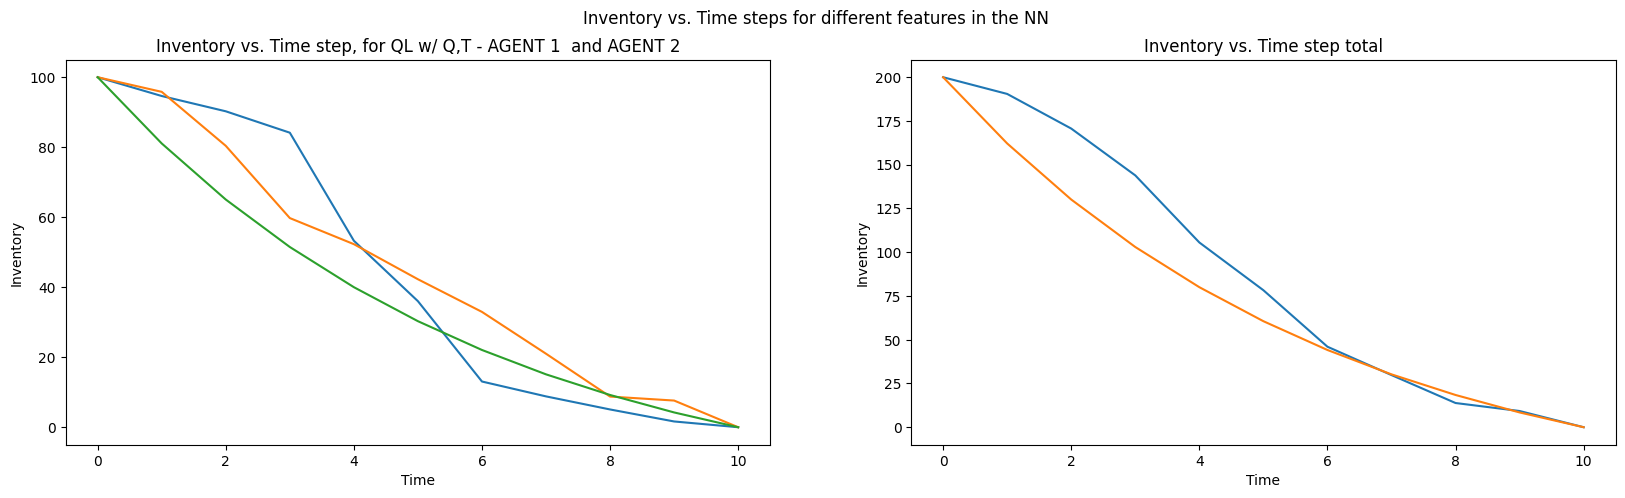

''

In [ ]:
'''Somma inventari per volumi totali tradati da etrambi gli agenti'''

INV = 100
azioni = azioni = dict(np.load('C:/Users/macri/Desktop/ennesima//azioni.npz', allow_pickle=True))
azionimu0 = azioni['arr_0'][0].mean(axis=1)
q0 = np.zeros(11) 
q0[0] = INV
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = azioni['arr_0'][1].mean(axis=1)
q = np.zeros(11) 
q[0] = INV
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

azioni_tw = np.ones((5_000,10)) * 2
twat = azioni_tw.reshape(-1,10).mean(0)
twap = np.zeros(11) 
twap[0] = INV
for i in range(1,10):
    twap[i] =  twap[i - 1] - twat[i - 1]

q_0 = 200#q_0 #* 2#/4
azioni1 = azioni['arr_0'][0].mean(axis=1)
azioni2 = azioni['arr_0'][1].mean(axis=1)
azioni = (azioni1 + azioni2)#/2
qt = np.zeros(T+1) 
qt[0] = q_0
for i in range(1,T):
    qt[i] =  qt[i - 1] - azioni[i - 1]



b = np.asarray(a)/2

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].plot(b)
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T - AGENT 1  and AGENT 2')

axs[1].plot(qt)
axs[1].plot(b*2)
axs[1].set_ylabel('Inventory')
axs[1].set_xlabel('Time')
axs[1].set_title('Inventory vs. Time step total')

fig.suptitle('Inventory vs. Time steps for different features in the NN')


plt.show()
;

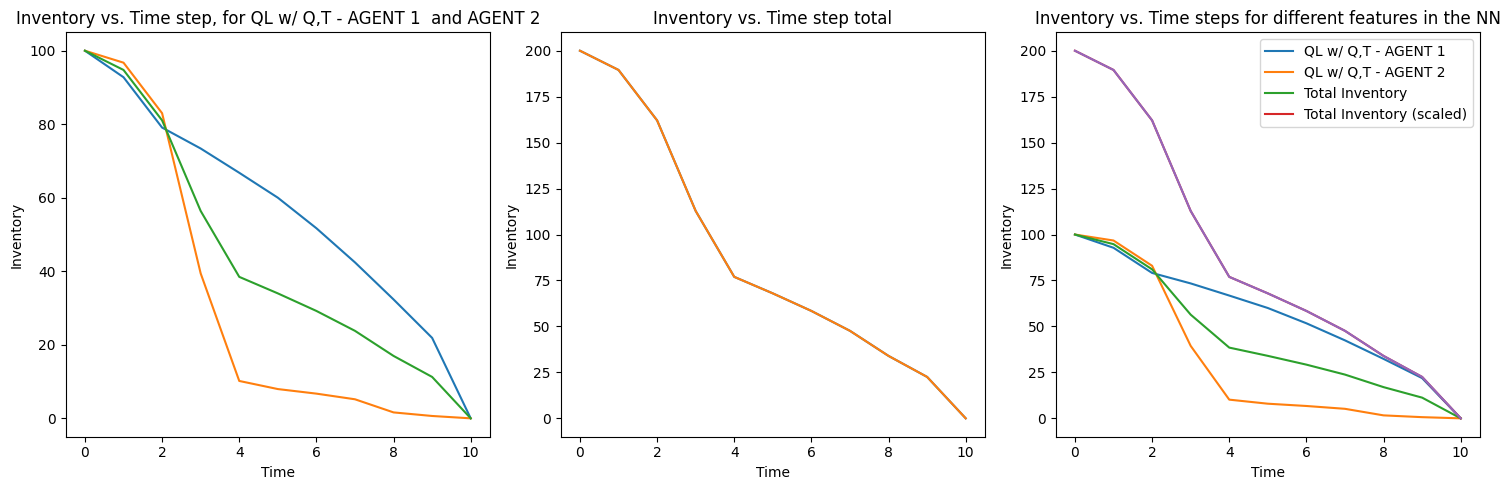

In [ ]:
def process_data(file_path):
    INV = 100
    azioni = dict(np.load(file_path, allow_pickle=True))
    
    azionimu0 = azioni['arr_0'][0].mean(axis=1)
    q0 = np.zeros(11)
    q0[0] = INV
    for i in range(1, 10):
        q0[i] = q0[i - 1] - azionimu0[i - 1]

    azionimu0qtp = azioni['arr_0'][1].mean(axis=1)
    q = np.zeros(11)
    q[0] = INV
    for i in range(1, 10):
        q[i] = q[i - 1] - azionimu0qtp[i - 1]

    azioni_tw = np.ones((5_000, 10)) * 2
    twat = azioni_tw.reshape(-1, 10).mean(0)
    twap = np.zeros(11)
    twap[0] = INV
    for i in range(1, 10):
        twap[i] = twap[i - 1] - twat[i - 1]

    T = 10  # Assuming T is defined somewhere in your code
    q_0 = 200  # Assuming q_0 is defined somewhere in your code
    azioni1 = azioni['arr_0'][0].mean(axis=1)
    azioni2 = azioni['arr_0'][1].mean(axis=1)
    azioni_combined = (azioni1 + azioni2)  #/2
    qt = np.zeros(T + 1)
    qt[0] = q_0
    for i in range(1, T):
        qt[i] = qt[i - 1] - azioni_combined[i - 1]
    
    return q0, q, qt

q0_vol0, q1_vol0, qt_vol0 = process_data('C:/Users/macri/Desktop/ennesima/ULTIMA_BASTA_VA_BENE/azioni.npz')
q0_vol0_01, q1_vol0_01, qt_vol0_01 = process_data('C:/Users/macri/Desktop/ennesima/ULTIMA_BASTA_VA_BENE/azioni.npz')
q0_vol0_001, q1_vol0_001, qt_vol0_001 = process_data('C:/Users/macri/Desktop/ennesima/ULTIMA_BASTA_VA_BENE/azioni.npz')


plt.figure(figsize=(15, 5))

# Plot 1
plt.subplot(131)
plt.plot(q0)
plt.plot(q)
plt.plot(np.asarray(qt) / 2)
plt.ylabel('Inventory')
plt.xlabel('Time')
plt.title('Inventory vs. Time step, for QL w/ Q,T - AGENT 1  and AGENT 2')

# Plot 2
plt.subplot(132)
plt.plot(qt)
plt.plot(np.asarray(qt) / 2 * 2)
plt.ylabel('Inventory')
plt.xlabel('Time')
plt.title('Inventory vs. Time step total')

# Plot 3
plt.subplot(133)
plt.plot(q0)
plt.plot(q)
plt.plot(np.asarray(qt) / 2)
plt.plot(qt)
plt.plot(np.asarray(qt) / 2 * 2)
plt.ylabel('Inventory')
plt.xlabel('Time')
plt.title('Inventory vs. Time steps for different features in the NN')
plt.legend(['QL w/ Q,T - AGENT 1', 'QL w/ Q,T - AGENT 2', 'Total Inventory', 'Total Inventory (scaled)'])

plt.tight_layout()
plt.show()

IndexError: index 500 is out of bounds for axis 1 with size 500

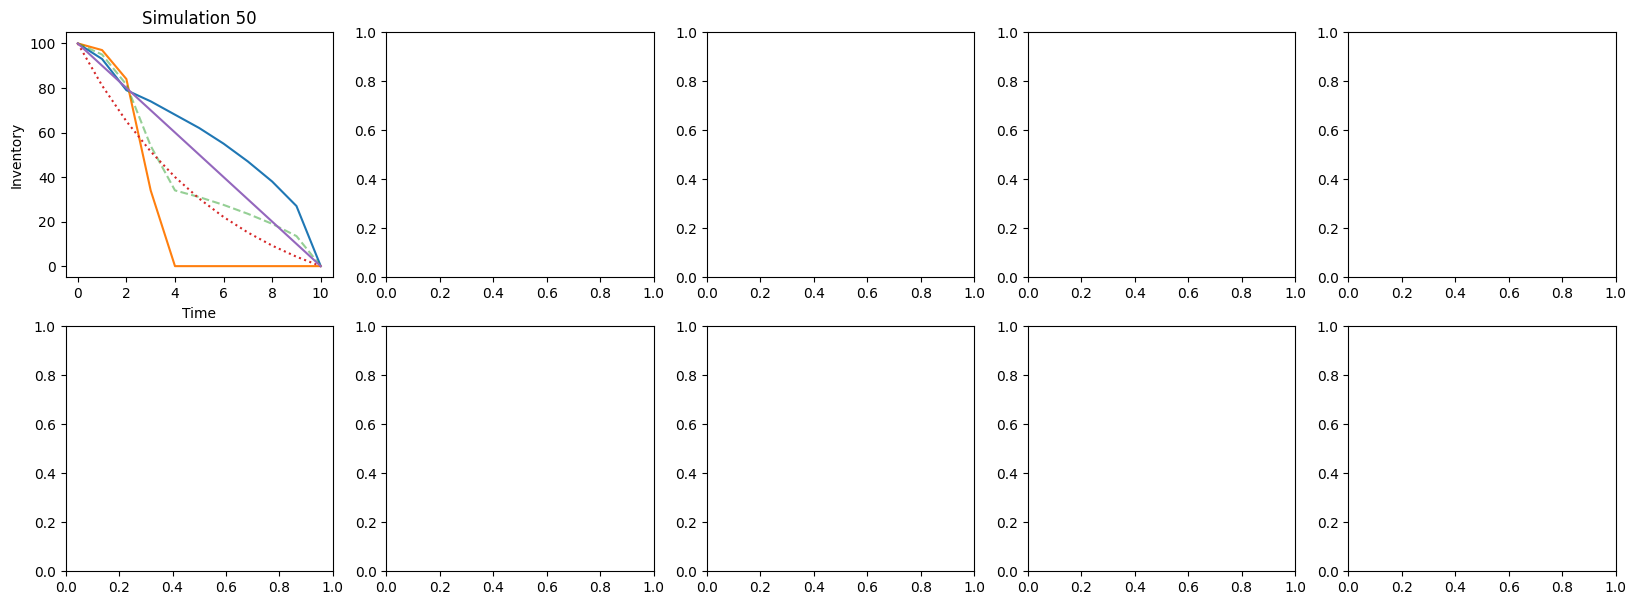

In [ ]:
''' Selling Schedules per episodio di test'''
def make_selling_schedule(ax, a, azioni, T, i=0, inv=100):
    azioni_tot_1 = azioni[0]
    azioni_tot_2 = azioni[1]
    agent_1 = azioni_tot_1[:, i]
    agent_2 = azioni_tot_2[:, i]
    
    q0_1 = np.zeros(T + 1)
    q0_1[0] = inv
    for j in range(1, T):
        q0_1[j] = q0_1[j - 1] - agent_1[j - 1]
    q0_2 = np.zeros(T + 1)
    q0_2[0] = inv
    for j in range(1, T):
        q0_2[j] = q0_2[j - 1] - agent_2[j - 1]

    q_tot = inv# * 2
    azioni_t = (agent_1 + agent_2) / 2
    qt = np.zeros(T + 1)
    qt[0] = q_tot
    for j in range(1, T):
        qt[j] = qt[j - 1] - azioni_t[j - 1]

    azioni_tw = np.ones((5_000,10)) * 10
    twat = azioni_tw.reshape(-1,10).mean(0)
    twap = np.zeros(11) 
    twap[0] = INV
    for i in range(1,10):
        twap[i] =  twap[i - 1] - twat[i - 1]

    b = np.asarray(a) / 2

    ax.plot(q0_1, label='Agent 1' )
    ax.plot(q0_2, label='Agent 2' )
    ax.plot(qt, alpha=0.5, label='Mean Agents' , linestyle='--')
    ax.plot(b, label='Nash Agent', linestyle=':')
    ax.plot(twap, label ='TWAP'  )

def do_is(i, dati, azioni, alpha=0.002):
    dati = dati#[i,:,0]
    azioni1 =  azioni[0]
    azioni2 =  azioni[1]
    azioni = (azioni1 + azioni2)
    iss = []

    iss = dati[: ,i ]* azioni[: ,i ] - \
               alpha * azioni[: ,i ]**2

    agents = np.sum((np.asarray(iss)))
    agents_std = np.sum((np.asarray(iss))).std()

    return 2000-remove_outliers(agents),  agents_std

# Load data
azioni_tot = dict(np.load('C:/Users/macri/Desktop/ennesima//azioni.npz', allow_pickle=True))
dati_tot   = dict(np.load('C:/Users/macri/Desktop/ennesima//dati.npz', allow_pickle=True))  
dati = dati_tot['arr_0'][:,0].reshape(10 , -1)
azioni = azioni_tot['arr_0']

T = len(azioni[0])

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 7))

# Plot each selling schedule
for i, ax in enumerate(axs.flat):
    i *= 500
    make_selling_schedule(ax, a, azioni, T, i, 100)
    ax.set_title(f"Simulation {i+50}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Inventory')
    IS, IS_std = do_is(i, dati, azioni, alpha=0.002)

# Get handles and labels from the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()

# Add legend using handles and labels
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 0.9), title='Legend:')

# Adjust layout
plt.tight_layout()
plt.show()


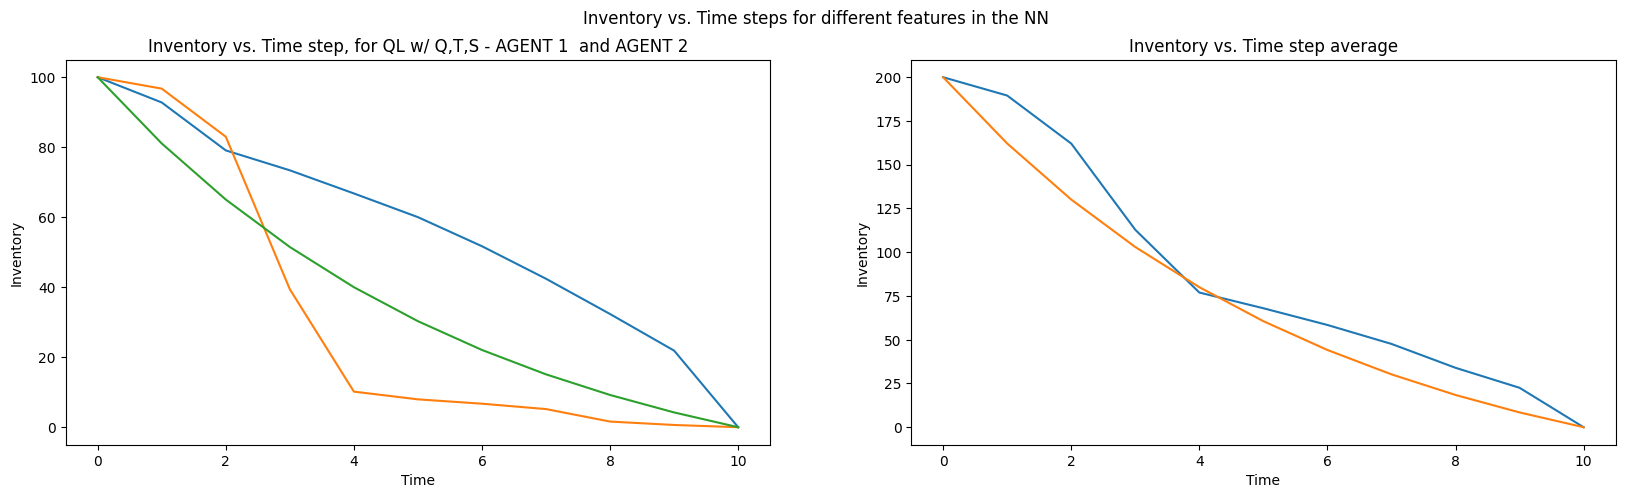

In [ ]:
'''Average selling schedule'''
INV = 100
azioni = dict(np.load('C:/Users/macri/Desktop/ennesima///azioni.npz', allow_pickle=True))
azionimu0 = azioni['arr_0'][0].mean(axis=1)
q0 = np.zeros(11) 
q0[0] = INV
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = azioni['arr_0'][1].mean(axis=1)
q = np.zeros(11) 
q[0] = INV
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

azioni_tw = np.ones((5_000,10)) * 2
twat = azioni_tw.reshape(-1,10).mean(0)
twap = np.zeros(11) 
twap[0] = INV
for i in range(1,10):
    twap[i] =  twap[i - 1] - twat[i - 1]

q_0 = 200#q_0 #* 2#/4
azioni1 = azioni['arr_0'][0].mean(axis=1)
azioni2 = azioni['arr_0'][1].mean(axis=1)
azioni = (azioni1 + azioni2)#/2
qt = np.zeros(T+1) 
qt[0] = q_0
for i in range(1,T):
    qt[i] =  qt[i - 1] - azioni[i - 1]



b = np.asarray(a)/2

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].plot(b)
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T,S - AGENT 1  and AGENT 2')

axs[1].plot(qt)
axs[1].plot(b*2)
axs[1].set_ylabel('Inventory')
axs[1].set_xlabel('Time')
axs[1].set_title('Inventory vs. Time step average')

fig.suptitle('Inventory vs. Time steps for different features in the NN')


plt.show()

IndexError: index 500 is out of bounds for axis 1 with size 500

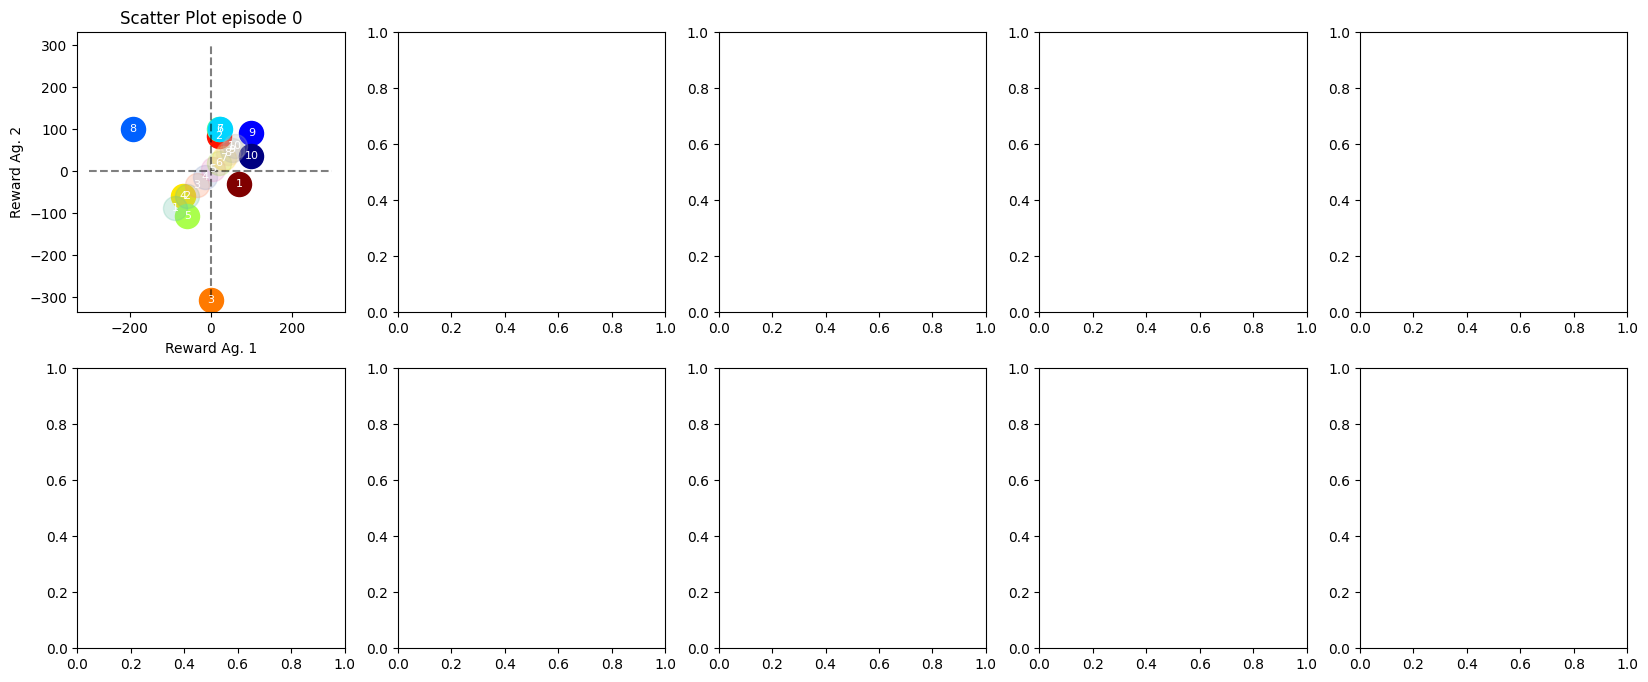

In [ ]:
'''Rewards per time steps per entrambi gli agenti'''

# Load data
rewards = dict(np.load('C:/Users/macri/Desktop/ennesima//re.npz', allow_pickle=True))
rewards_sch = dict(np.load('C:/Users/macri/Desktop/ennesima/THEO_100_inv/vola_0.01/re.npz', allow_pickle=True))
rewards_0     = (rewards['arr_0'][0]    )
rewards_1     = (rewards['arr_0'][1]    )

rewards['arr_0'][0].shape
rewards_sch_0 = (rewards_sch['arr_0'][0])
rewards_sch_1 = (rewards_sch['arr_0'][1])

rewards_per_episode(rewards_0, rewards_1, rewards_sch_0, rewards_sch_1)